<a href="https://colab.research.google.com/github/Sumukhfintech/github-pages/blob/main/SPY_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas
!pip install quarto
!jupyter nbconvert SPY Project1.ipynb --to quarto

[NbConvertApp] WARNING | pattern 'SPY' matched no files
[NbConvertApp] WARNING | pattern 'Project1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equiva

We assume that the investor on January 1, 2024 on how to invest his $10,000 to generate the most returns. He has decided that the S&P 500 etf would give the most diversification but is confused on the strategies that would give the most returns. The investor has 4 strategies in mind, and plans to backtest the strategies to decide on the future course of action.
We assume the investor is from texas, so would not be liable to state income tax or a capital gains tax and uses a zero brokerage account.

We also assume that all the taxes are settled at the end of the year for short term capital gains tax. We also assume that the tax harvest is adjusted automatically throughout the lifespan, and we assume that the person doesn't face issue of the $3000 tax harvesting limit.

### **Strategy 1**

In [ ]:
etfdata = yf.download(tickers = 'SPY',start='1993-01-29', end='2023-12-31') #downloads daily etf price data as a dataframe from start of etf trading till last date
print(f"\nDatatype of etfdataframe:\n{etfdata.dtypes}") #check datatypes of the loaded dataset
etfdata_df = etfdata.copy(deep = True) #We will use this for strategy 1
etfdata_df= etfdata.reset_index() #Converting the Date Index into a column in the dataframe
print(f"\nThe datatype of the etf_df dataframe:\n{etfdata_df.dtypes}\n\nWe have now successfully removed the herierachial index with date")

[*********************100%%**********************]  1 of 1 completed


Datatype of etfdataframe:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

The datatype of the etf_df dataframe:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

We have now successfully removed the herierachial index with date


In [ ]:
etfdata_df['log_return'] = np.log1p(etfdata_df['Adj Close'].pct_change()) #Utilizing log returns for its usefuleness. We use adj close because holders of SPY get dividends not accounted in closing price.
etfdata_df = etfdata_df.dropna() #drop any row with value NA

In [ ]:
etfdata_df['cum_log_returns'] = etfdata_df['log_return'].cumsum() #get cumulative logreturns day by day
etfdata_df['year'] = etfdata_df['Date'].dt.year #Creating an year column by extracting the year from the datetimeindex
etfdata_df['Cumulative_Daily_HPR(in %)'] = 100*(np.exp(etfdata_df['cum_log_returns']) - 1)#returns for holding n number of days
etfdata_df[['Date', 'Adj Close', 'log_return', 'cum_log_returns','Cumulative_Daily_HPR(in %)']] #columns we need for strategy1

,Date,Adj Close,log_return,cum_log_returns,Cumulative_Daily_HPR(in %)
1,1993-02-01,25.017365,0.007088,0.007088,0.711274
2,1993-02-02,25.070360,0.002116,0.009204,0.924616
3,1993-02-03,25.335381,0.010516,0.019719,1.991497
4,1993-02-04,25.441374,0.004175,0.023894,2.418189
5,1993-02-05,25.423691,-0.000695,0.023199,2.347004
...,...,...,...,...,...
7781,2023-12-22,473.649994,0.002008,2.947986,1806.751384
7782,2023-12-26,475.649994,0.004214,2.952200,1814.802694
7783,2023-12-27,476.510010,0.001806,2.954006,1818.264821
7784,2023-12-28,476.690002,0.000378,2.954384,1818.989409


In [ ]:
#Calculating the portfolio returns
hpr = etfdata_df['Cumulative_Daily_HPR(in %)'].iloc[-1] #to get hpr
inv = 10000 #we invest $10,000
pretaxret = (1+hpr) * inv
print(f"Returns from conducting this strategy: {hpr:.2f}%") #fstrings are the same as format for newer python and we use 2 decimals
print(f"Pretax return: ${pretaxret:.2f}")
#Only 60% of income can be accounted for LTCG and 40% is STCG. Assuming it's a single filer who makes less than 11,000 in income . The person needs to only pay 10%
posttaxret = pretaxret - (0.4*pretaxret*0.1)
overallhpr = (posttaxret/inv) - 1
print(f"\nFinal return: ${posttaxret:.2f}")
print(f"Tax adjusted returns from holding the portfolio: {overallhpr:.2f}%")

Returns from conducting this strategy: 1813.43%
Pretax return: $18144339.86

Final return: $17418566.27
Tax adjusted returns from holding the portfolio: 1740.86%


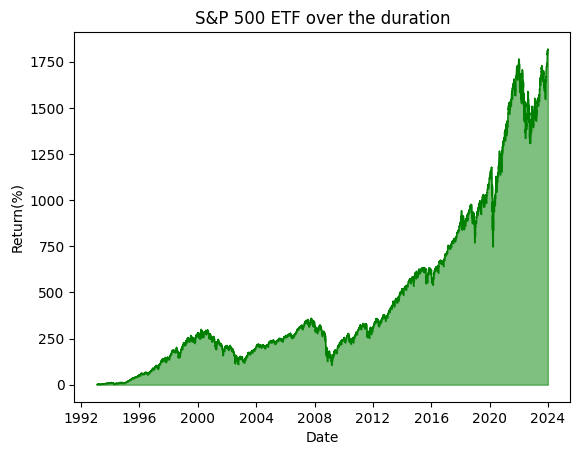

In [ ]:
#Plotting the price movement over time
plt.plot(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color ='green',linewidth = 1) #plotting the line graph
plt.fill_between(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color ='green',alpha = 0.5) #Function to fill in the area in between
plt.title('S&P 500 ETF over the duration')
plt.xlabel('Date')
plt.ylabel('Return(%)')
plt.show() #plotting the graph

[*********************100%%**********************]  1 of 1 completed


Return if person invests in the 30 year bond at 1993 in 2023: $ 10028.84


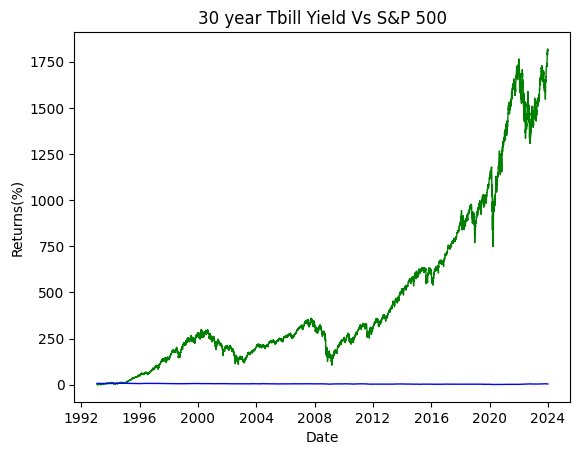

The blue line represents the daily yield of the 30 Year T bond. If the person invests in the Tbond at the same start date as SPY then they earn 7.21%.
We can see the line remains relatively flat, so even discounting early won't give the investor a lot of returns compared to the exponential returns possible through SPY


In [ ]:
#Charting against a hypothetical risk free yield curve

#Gathering risk free data
tbill_df = yf.download(tickers = '^TYX', start = '1993-01-29', end = '2023-12-31') #downloading 30 year tbond as comparison
tbill_df = tbill_df.reset_index()
yieldinv = tbill_df[tbill_df['Date'] == '1993-01-29']['Adj Close'].iloc[0]
tax=0.1
tbret = (1+(yieldinv/100))*10000
gaintbill = tbret - 10000

#Check if the investor made gain
if gaintbill > 0:
  taxable = gaintbill - (0.4*gaintbill*tax)
  tbret = tbret - taxable

print(f"Return if person invests in the 30 year bond at 1993 in 2023: ${tbret: .2f}")

#Matching dates
merged_ret = pd.merge(tbill_df[['Date','Adj Close']],etfdata_df[['Date','Cumulative_Daily_HPR(in %)']], on = 'Date', how = 'inner')

#Plotting
plt.plot(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color = 'green', linewidth = 1)
plt.plot(tbill_df['Date'],tbill_df['Adj Close'],color ='blue',linewidth = 1)
plt.title("30 year Tbill Yield Vs S&P 500")
plt.xlabel('Date')
plt.ylabel('Returns(%)')
plt.show()

print(f"The blue line represents the daily yield of the 30 Year T bond. If the person invests in the Tbond at the same start date as SPY then they earn {yieldinv:.2f}%.")
print("We can see the line remains relatively flat, so even discounting early won't give the investor a lot of returns compared to the exponential returns possible through SPY")


#**Strategy 2**

In [ ]:
#We need Open and Close Prices for day trading. Plus a column for tax adjusted returns.
etfdata_of = etfdata.copy(deep = True)
etfdata_of = etfdata_of.reset_index()
etfdata_of['log_return'] = np.log1p(etfdata_of[['Open','Close']].pct_change(axis = 1)['Close'])
etfdata_of['cum_log_returns'] = etfdata_of['log_return'].cumsum()
etfdata_of['Inv_ret(%)'] = 100*(np.exp(etfdata_of['cum_log_returns']) - 1)
etfdata_of['Year'] = etfdata_of['Date'].dt.year

#Add an exit loop if investment loss are more than 100%
# Find the index where Portfolio_ret(in %) is -100 or less for the first time
close_trade = etfdata_of[etfdata_of['Inv_ret(%)'] <= -100].first_valid_index()

# If such a value is found, truncate the dataframe at that point
if close_trade is not None:
    # Slice the dataframe to include rows up to the found index
    etfdata_of = etfdata_of.loc[:close_trade-1]
else:
    # If no such value is found, the dataframe remains unchanged
    print("Investor never loses full amount.The investor can continue trading throughout the duration.\n")

print(etfdata_of[['Date','Adj Close','Inv_ret(%)']])
dayret = etfdata_of['Inv_ret(%)'].iloc[-1]
print(f"\n If there is no taxes, then the return earned by the investor is {dayret: .2f}%")

Investor never loses full amount.The investor can continue trading throughout the duration.

           Date   Adj Close  Inv_ret(%)
0    1993-01-29   24.840679   -0.071073
1    1993-02-01   25.017365    0.568131
2    1993-02-02   25.070360    0.852423
3    1993-02-03   25.335381    1.775070
4    1993-02-04   25.441374    1.845796
...         ...         ...         ...
7781 2023-12-22  473.649994   11.492349
7782 2023-12-26  475.649994   11.863932
7783 2023-12-27  476.510010   12.115689
7784 2023-12-28  476.690002   12.071019
7785 2023-12-29  475.309998   11.793483

[7786 rows x 3 columns]

 If there is no taxes, then the return earned by the investor is  11.79%


In [ ]:
#Calculating after_tax return
#Person at the end of the year can harvest their losses to recoup the short term capital gains tax paid
yearly_returns = etfdata_of.groupby('Year')['Inv_ret(%)'].last() - etfdata_of.groupby('Year')['Inv_ret(%)'].first()
print(pd.DataFrame(yearly_returns))

# Create profit and loss variables
profit = 0
loss = 0

# Calculate profit and loss for each year
for year,yreturn in yearly_returns.items():
    if yreturn > 0:
      if 1993 <= year <= 2000:
        profit += yreturn * 0.85 #tax during this time is 15%
      else:
        profit += yreturn * 0.9 #tax during this time is 10%
    else:
        loss += yreturn

# Calculate net return after adjusting for loss
net_return = profit + loss

# Assuming an initial investment of 10,000
initial_investment = 10000
post_tax_investment_value = initial_investment + (initial_investment * net_return / 100)

print(f"Post-tax return on investment: ${post_tax_investment_value: .2f}")
print(f"Post-tax return from day-trading: {net_return: .2f}%")

      Inv_ret(%)
Year            
1993   -4.422733
1994   -7.131518
1995   25.021857
1996    1.315895
1997    0.336789
1998    0.165032
1999  -19.685626
2000  -25.815947
2001    3.344750
2002   -9.472566
2003   10.453478
2004    3.242005
2005   -6.535369
2006    2.716985
2007   -5.910538
2008  -16.825351
2009    7.126459
2010    3.451470
2011   -1.936790
2012    5.718446
2013    9.734806
2014    2.109882
2015   -0.446361
2016   11.694533
2017    4.920443
2018  -15.822464
2019    9.561566
2020    2.579608
2021   10.190754
2022   -5.839430
2023   18.857904
Post-tax return on investment: $ 9810.17
Post-tax return from day-trading: -1.90%


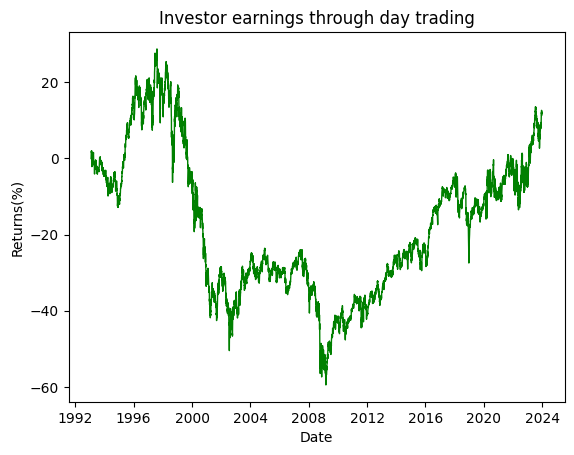

In [ ]:
#Plot the pre tax investing returns
plt.plot(etfdata_of['Date'],etfdata_of['Inv_ret(%)'],color='green', linewidth = 1)
plt.title("Investor earnings through day trading")
plt.xlabel('Date')
plt.ylabel('Returns(%)')
plt.show()

##**Strategy 3**

In [ ]:
#we assume both overnight and pre-market session for the strategy for ease of data
etfdata_raw = etfdata.copy(deep = True)
etfdata_raw = etfdata_raw.reset_index() #changing date to remove heriarchial index
etfdata_raw = etfdata_raw[["Date","Open","Adj Close"]] #we need only these two for over night
open = (etfdata_raw['Open'][1:].reset_index())["Open"] #we exit in day 2 so slicing from 1
adj_close = (etfdata_raw['Adj Close'][0:7785].reset_index())["Adj Close"] #we enter at day 1 and will enter till n-1 days
etfdata_raw['Year'] = etfdata_raw['Date'].dt.year

#Calculating the profit
net_profit = adj_close - open
net_profit_pct = net_profit.pct_change()
etfdata_raw["capital_gain"] = net_profit_pct
etfdata_raw = etfdata_raw.dropna() #dropping the non entry days
etfdata_raw['cum_inv(%)'] = (1+etfdata_raw['capital_gain']).cumprod()

#Add an exit loop if investment loss are more than 100%
# Find the index where Portfolio_ret(in %) is -100 or less for the first time
close_trade1 = etfdata_raw[etfdata_raw['cum_inv(%)'] <= -100].first_valid_index()

# If such a value is found, truncate the dataframe at that point
if close_trade1 is not None:
    # Slice the dataframe to include rows up to the found index
    etfdata_raw = etfdata_raw.loc[:close_trade1-1]
else:
    # If no such value is found, the dataframe remains unchanged
    print("Investor never loses full amount.The investor can continue trading throughout the duration.\n")

print(etfdata_raw[['Date','Adj Close','cum_inv(%)']])
oret = etfdata_raw['cum_inv(%)'].iloc[-1]
print(f"\n If there is no taxes, then the return earned by the investor is {oret: .2f}%")

Investor never loses full amount.The investor can continue trading throughout the duration.

           Date   Adj Close  cum_inv(%)
1    1993-02-01   25.017365    1.003833
2    1993-02-02   25.070360    1.010865
3    1993-02-03   25.335381    1.026417
4    1993-02-04   25.441374    1.020875
5    1993-02-05   25.423691    1.021800
...         ...         ...         ...
7780 2023-12-21  472.700012    0.060642
7781 2023-12-22  473.649994    0.021958
7782 2023-12-26  475.649994   -0.010978
7783 2023-12-27  476.510010    0.019343
7784 2023-12-28  476.690002   -0.010456

[7784 rows x 3 columns]

 If there is no taxes, then the return earned by the investor is -0.01%


In [ ]:
#Calculating after_tax return
#Person at the end of the year can harvest their losses to recoup the short term capital gains tax paid
yearly_returns = etfdata_raw.groupby('Year')['cum_inv(%)'].last() - etfdata_raw.groupby('Year')['cum_inv(%)'].first()
print(pd.DataFrame(yearly_returns))

# Create profit and loss variables
profit = 0
loss = 0

# Calculate profit and loss for each year
for year,yreturn in yearly_returns.items():
    if yreturn > 0:
      if 1993 <= year <= 2000:
        profit += yreturn * 0.85 #tax during this time is 15%
      else:
        profit += yreturn * 0.9 #tax during this time is 10%
    else:
        loss += yreturn

# Calculate net return after adjusting for loss
net_return = profit + loss

# Assuming an initial investment of 10,000
initial_investment = 10000
post_tax_investment_value = initial_investment + (initial_investment * net_return / 100)

print(f"Post-tax return on investment: ${post_tax_investment_value: .2f}")
print(f"Post-tax return from overnight-trading: {net_return: .2f}%")


      cum_inv(%)
Year            
1993    0.020299
1994   -0.052689
1995    0.273757
1996    0.209671
1997    0.402892
1998    0.433305
1999    0.474472
2000   -0.168506
2001   -0.245162
2002   -0.506507
2003    0.316231
2004    0.089720
2005    0.014487
2006    0.155961
2007   -0.006845
2008   -0.833038
2009    0.204685
2010    0.104738
2011   -0.021902
2012    0.180328
2013    0.174380
2014    0.048033
2015   -0.310141
2016   -0.004107
2017    0.036318
2018   -0.534585
2019    0.190060
2020    0.082203
2021    0.030675
2022   -0.444823
2023   -0.431892
Post-tax return on investment: $ 9944.71
Post-tax return from overnight-trading: -0.55%


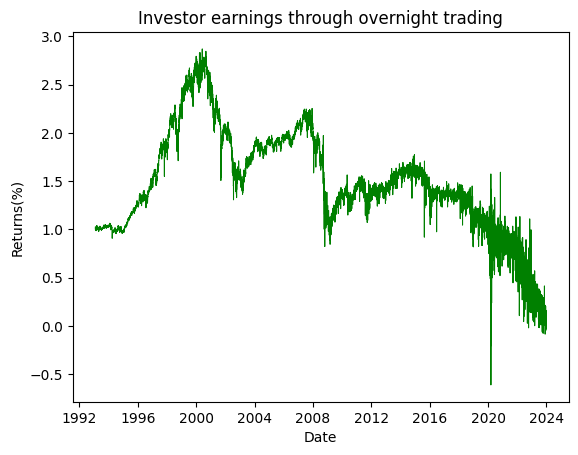

In [ ]:
#Plot the pre tax investing returns
plt.plot(etfdata_raw['Date'],etfdata_raw['cum_inv(%)'],color='green', linewidth = 0.75)
plt.title("Investor earnings through overnight trading")
plt.xlabel('Date')
plt.ylabel('Returns(%)')
plt.show()

# **Strategy 4**

In [ ]:
#Removing the least values
etfdata_df_minranks = etfdata_df.copy(deep=True) #create deepcopy to prevent any changes to original
etfdata_df_minranks["rank"] = etfdata_df_minranks.groupby("year")['log_return'].rank(method="first", ascending=True) #ranks assigned by the order they appear
etfdata_df_minranks = etfdata_df_minranks[~etfdata_df_minranks['rank'].isin([1, 2, 3])] #removing the three worst days
etfdata_df_minranks.drop(columns=['rank'], inplace=True) #columns no longer needed

In [ ]:
#Removing the max values
etfdata_df_maxranks = etfdata_df.copy(deep=True)
etfdata_df_maxranks["rank"] = etfdata_df_maxranks.groupby("year")['log_return'].rank(method="first", ascending=False) #ranks assigned by the order they appear
etfdata_df_maxranks = etfdata_df_maxranks[~etfdata_df_maxranks['rank'].isin([1, 2, 3])] #removing the best three days
etfdata_df_maxranks.drop(columns=['rank'], inplace=True) #columns no longer needed

In [ ]:
etfdata_df2 = pd.merge(etfdata_df_minranks, etfdata_df_maxranks, how='inner') #innerjoin to combine the values without the best and worst values
etfdata_df2['cum_log_returns'] = etfdata_df2['log_return'].cumsum()
etfdata_df2['Cumulative_Daily_HPR(in %)'] = 100*(np.exp(etfdata_df2['cum_log_returns']) - 1)
print(etfdata_df2[["Date",'year', "Adj Close","log_return",'Cumulative_Daily_HPR(in %)']])

#Pre tax returns
wret = etfdata_df2['Cumulative_Daily_HPR(in %)'].iloc[-1]
print(f"\n If there is no taxes, then the return earned by the investor is {wret: .2f}%")

           Date  year   Adj Close  log_return  Cumulative_Daily_HPR(in %)
0    1993-02-01  1993   25.017365    0.007088                    0.711274
1    1993-02-02  1993   25.070360    0.002116                    0.924616
2    1993-02-03  1993   25.335381    0.010516                    1.991497
3    1993-02-04  1993   25.441374    0.004175                    2.418189
4    1993-02-05  1993   25.423691   -0.000695                    2.347004
...         ...   ...         ...         ...                         ...
7594 2023-12-22  2023  473.649994    0.002008                 2102.522666
7595 2023-12-26  2023  475.649994    0.004214                 2111.822878
7596 2023-12-27  2023  476.510010    0.001806                 2115.822043
7597 2023-12-28  2023  476.690002    0.000378                 2116.659028
7598 2023-12-29  2023  475.309998   -0.002899                 2110.241859

[7599 rows x 5 columns]

 If there is no taxes, then the return earned by the investor is  2110.24%


In [ ]:
#Calculating after_tax return
#Person at the end of the year can harvest their losses to recoup the short term capital gains tax paid
yearly_returns = etfdata_df2.groupby('year')['Cumulative_Daily_HPR(in %)'].last() - etfdata_df2.groupby('year')['Cumulative_Daily_HPR(in %)'].first()
print(pd.DataFrame(yearly_returns))

# Create profit and loss variables
profit = 0
loss = 0

# Calculate profit and loss for each year
for year,yreturn in yearly_returns.items():
    if yreturn > 0:
      if 1993 <= year <= 2000:
        profit += yreturn * 0.85 #tax during this time is 15%
      else:
        profit += yreturn * 0.9 #tax during this time is 10%
    else:
        loss += yreturn

# Calculate net return after adjusting for loss
net_return = profit + loss
a = [net_return]

print(a.sort())




# Assuming an initial investment of 10,000
initial_investment = 10000
post_tax_investment_value = initial_investment + (initial_investment * net_return / 100)

print(f"Post-tax return on investment: ${post_tax_investment_value: .2f}")
print(f"Post-tax return from overnight-trading: {net_return: .2f}%")

      Cumulative_Daily_HPR(in %)
year                            
1993                    8.234933
1994                    1.550930
1995                   40.886317
1996                   37.754140
1997                   68.480725
1998                   78.514987
1999                   66.758803
2000                  -40.041423
2001                  -33.343629
2002                  -83.009211
2003                   63.863817
2004                   34.816193
2005                   16.609450
2006                   48.781545
2007                   25.042338
2008                 -166.114795
2009                   54.666816
2010                   44.292596
2011                   15.334954
2012                   59.215478
2013                  153.340817
2014                   90.267922
2015                   21.136177
2016                  110.383460
2017                  184.408267
2018                  -39.030740
2019                  321.455555
2020                  328.467144
2021      

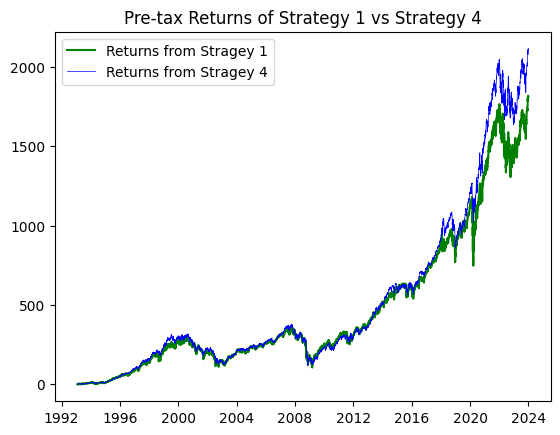

In [ ]:
plt.plot(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color ='green',linewidth = 1.5,label ='Returns from Stragey 1') #plotting the line graph
plt.plot(etfdata_df2['Date'],etfdata_df2['Cumulative_Daily_HPR(in %)'],color = 'blue', linewidth = 0.5, label = 'Returns from Stragey 4')
plt.title("Pre-tax Returns of Strategy 1 vs Strategy 4")
plt.legend()

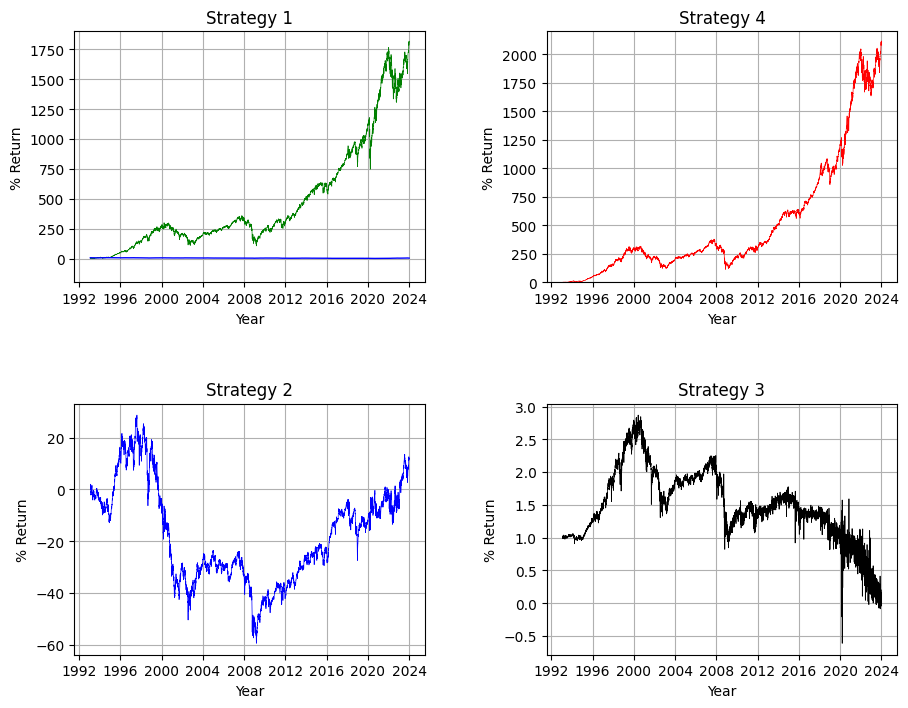

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].plot(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color ='green',linewidth = 0.5,label ='Returns from Stragey 1')
axs[0,0].plot(tbill_df['Date'],tbill_df['Adj Close'],color ='blue',linewidth = 1)
axs[0,0].set_title("Strategy 1")
axs[0, 0].grid(True)
axs[0, 0].set_ylim(-200, 1900)
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('% Return')

axs[0,1].plot(etfdata_df2['Date'],etfdata_df2['Cumulative_Daily_HPR(in %)'], color ='red',linewidth = 0.5,label ='Returns from Stragey 1')
axs[0,1].set_title("Strategy 4")
axs[0, 1].grid(True)
axs[0, 1].set_ylim(0, 2200)
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('% Return')


axs[1,0].plot(etfdata_of['Date'],etfdata_of['Inv_ret(%)'],color='blue', linewidth = 0.5)
axs[1,0].set_title("Strategy 2")
axs[1, 0].grid(True)
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('% Return')



axs[1,1].plot(etfdata_raw['Date'],etfdata_raw['cum_inv(%)'],color='black', linewidth = 0.55)
axs[1,1].set_title("Strategy 3")
axs[1, 1].grid(True)
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('% Return')

plt.tight_layout(pad=4.0)

# Show the plot
plt.show()
